**Import libraries**

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer 

**Read data**

In [4]:
emails = pd.read_csv('emails.csv')
emails

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


**Example of a Spam mail**  (row 0)

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction  guaranteed : we provide unlimited amount of changes with no extra fees for you to  be surethat you will love the result of this collaboration . have a look at our  portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _


**Example of a Ham mail**  (row 5727)

Subject: news : aurora 5 . 2 update  aurora version 5 . 2  - the fastest model just got faster -  epis announces the release of aurora , version 5 . 2  aurora the electric market price forecasting tool is already  legendary for power and speed . we ' ve combined a powerful chronological  dispatch model with the capability to simulate the market from 1  day to 25 + years . add to that a risk analysis section , powered by user  selectable monte carlo & / or latin hypercube modeling , enough  portfolio analysis power to please the toughest critic , & inputs and  outputs from standard excel & access tables and you ' ve got one of most  powerful tools in the market .  just a few months ago we expanded our emissions modeling  capabilities , added our quarterly database update , increased the speed  of the entire model , and made  but that wasn ' t enough .  we ' ve done it again . some of the operations that we ' ve  included . . .  two new reporting enhancements .  the first is marginal reporting  for fuels , resources and groups of resources .  the second is the ability to  display resource stack information in graphical and dispatch order form .  other enhancements include dual fuel modeling , improved  transmission modeling , greater access to hourly results , and the ability  to model monthly emission rates . moreover , the databases for  central and eastern , texas , and western markets have been updated to use  the new modeling capabilities .  we continue to make aurora easier to use . this version enhances  user control over modeling , editing inputs , and viewing of aurora  output . clients desiring to exploit the power of aurora now have  greater control over the inputs and outputs through vb scripting in  aurora . the new " update data " capability provides a means to  universally change any data element .  attached is more information on the fastest and most flexible  tool of its kind .  for additional information , please visit our website ( www . epis . com ) or  contact our sales department at ( 503 ) 722 - 2023 . ask about our special  7 - day demo !  v . todd wheeler  sales manager  epis , inc .  ( 503 ) 722 - 2023 tel .  ( 503 ) 722 - 7130 fax  www . epis . com  todd @ epis . com  > >  - what ' s new - version 5 . 2 information . doc  - technical information aurora v 5 - 2 . doc


**Exploratory Data Analysis**

In [14]:
emails.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [16]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


Missing values :
text    0
spam    0
dtype: int64


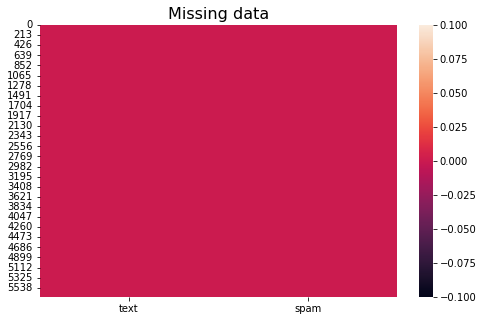

In [37]:
print("Missing values :")
print(emails.isnull().sum())

font={'fontsize':16}
plt.figure(figsize=(8,5))
plt.title("Missing data",font)
sns.heatmap(emails.isnull())
plt.show()

``` No missing data```

% of spam emails :  23.88 %
% of ham emails :  76.12 %


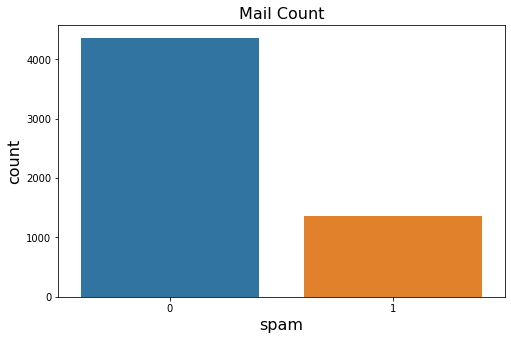

In [44]:
print("% of spam emails : ", round(len(emails[emails['spam']==1])*100/len(emails),2),"%")
print("% of ham emails : ", round(len(emails[emails['spam']==0])*100/len(emails),2),"%")

plt.figure(figsize=(8,5))
plt.title("Mail Count",font)
plt.xlabel("spam",font)
plt.ylabel("count",font)
sns.countplot(x=emails['spam'])
plt.show()

**Prepare data for training and testing**

In [73]:
emails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [87]:
X = emails.text.copy()
cvr = CountVectorizer()
X = cvr.fit_transform(X)
X = X.toarray()

y = emails.spam.copy()

print("X shape : ",X.shape)
print("y shape : ",y.shape)

print("X : ")
pd.DataFrame(data=X,columns=cvr.get_feature_names())




X shape :  (5728, 37303)
y shape :  (5728,)
X : 


,00,000,0000,000000,00000000,0000000000,000000000003619,000000000003991,000000000003997,000000000005168,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5724,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5725,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
